In [1]:
import pandas as pd
import numpy as np

# Load the datasets downloaded from Kaggle

In [7]:
df_2022_train = pd.read_csv('../data/raw/2022_train.csv')
df_2022_test = pd.read_csv('../data/raw/2022_test.csv')

In [8]:
df_2022_train.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [9]:
df_2022_test.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,1,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,2,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,3,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,4,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


# 1. Structure investigation

#### *The raw train datasets have 8000 rows and 21 columns.  The test data set have 3799 rows and 20 columns.  The train data set have the target variable.  They both have all columns numerical type.*

In [10]:
df_2022_train.shape

(8000, 21)

In [13]:
df_2022_test.shape

(3799, 20)

In [11]:
df_2022_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null   float64
 19  TOV   

In [14]:
df_2022_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       3799 non-null   int64  
 1   GP       3799 non-null   int64  
 2   MIN      3799 non-null   float64
 3   PTS      3799 non-null   float64
 4   FGM      3799 non-null   float64
 5   FGA      3799 non-null   float64
 6   FG%      3799 non-null   float64
 7   3P Made  3799 non-null   float64
 8   3PA      3799 non-null   float64
 9   3P%      3799 non-null   float64
 10  FTM      3799 non-null   float64
 11  FTA      3799 non-null   float64
 12  FT%      3799 non-null   float64
 13  OREB     3799 non-null   float64
 14  DREB     3799 non-null   float64
 15  REB      3799 non-null   float64
 16  AST      3799 non-null   float64
 17  STL      3799 non-null   float64
 18  BLK      3799 non-null   float64
 19  TOV      3799 non-null   float64
dtypes: float64(18), int64(2)
memory usage: 593.7 KB


#### *Create a copy of each of the data to preserve the original data. Rename the features into something more descriptive!*

In [46]:
df_main = df_2022_train.rename(columns = {
    'GP':'Games Played', 
    'MIN':'Minutes Played',
    'PTS':'Points Per Game',
    'FGM' : 'Field Goals Made',
    'FGA' : 'Field Goals Attempts',
    'FG%' : 'Field Goals Percent',
    '3P Made' : '3Points Made',
    '3PA' : '3Points Attempts',
    '3P%' : '3Points Percent',
    'FTM' : 'Free Throw Made',
    'FTA' : 'Free Throw Attempts',
    'FT%' : 'Free Throw Percent',
    'OREB' : 'Offensive Rebounds',
    'DREB' : 'Defensive Rebounds',
    'REB' : 'Rebounds',
    'AST' : 'Assists',
    'STL' : 'Steals',
    'BLK' : 'Blocks',
    'TOV' : 'Turnovers'
    })

df_main.head(20)

,Id,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1
5,3804,88,20.0,8.8,3.7,8.7,43.6,-0.2,-0.5,6.9,...,2.8,75.1,1.8,2.9,4.7,1.8,0.4,0.3,1.1,1
6,3805,70,20.6,7.0,3.2,5.4,58.9,0.1,-0.1,-3.6,...,1.4,56.7,2.9,4.6,7.6,0.6,0.4,0.7,1.2,1
7,3806,57,17.6,5.4,1.7,4.7,37.2,0.9,2.8,33.2,...,1.8,78.3,0.8,1.7,2.6,0.4,0.6,0.6,0.3,1
8,3807,46,26.5,9.3,3.1,7.2,44.0,0.6,1.7,27.5,...,2.3,82.1,1.3,2.8,4.1,1.8,0.7,0.6,1.7,1
9,3808,64,33.4,16.9,6.4,11.3,59.0,0.3,1.1,-13.0,...,4.9,74.9,3.4,8.0,11.9,0.8,0.4,2.5,2.4,1


In [45]:
df_test = df_2022_test.rename(columns = {
    'GP':'Games Played', 
    'MIN':'Minutes Played',
    'PTS':'Points Per Game',
    'FGM' : 'Field Goals Made',
    'FGA' : 'Field Goals Attempts',
    'FG%' : 'Field Goals Percent',
    '3P Made' : '3Points Made',
    '3PA' : '3Points Attempts',
    '3P%' : '3Points Percent',
    'FTM' : 'Free Throw Made',
    'FTA' : 'Free Throw Attempts',
    'FT%' : 'Free Throw Percent',
    'OREB' : 'Offensive Rebounds',
    'DREB' : 'Defensive Rebounds',
    'REB' : 'Rebounds',
    'AST' : 'Assists',
    'STL' : 'Steals',
    'BLK' : 'Blocks',
    'TOV' : 'Turnovers'
    })

df_test.head(20)

,Id,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,0,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,1,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,2,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,3,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,4,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9
5,5,59,16.1,7.1,2.8,4.5,62.0,-0.1,-0.6,3.4,1.7,2.7,58.6,1.8,2.6,4.6,0.6,0.6,0.4,0.9
6,6,45,8.3,3.2,1.4,2.8,46.4,-0.5,-1.6,8.9,0.5,0.7,69.3,0.5,0.5,1.2,0.2,0.1,0.2,0.4
7,7,53,12.1,4.7,1.8,4.1,44.1,0.1,0.2,25.7,0.9,1.0,80.2,0.6,1.1,1.6,0.8,0.4,-0.2,0.6
8,8,41,21.6,7.9,3.1,6.0,49.6,0.3,0.9,-14.8,1.8,2.2,77.6,2.4,2.6,5.1,1.4,0.5,0.4,1.4
9,9,25,10.0,2.6,1.0,2.3,45.0,0.2,0.7,11.7,0.4,0.5,84.1,0.4,1.5,1.8,0.4,0.2,0.2,0.5


# 2. Quality investigation

## 2.1 Duplicates

In [28]:
# Check number of duplicates
duplicates_count = df_main.duplicated().sum()
print(f"You have {duplicates_count} duplicates in the main data.")

You have 0 duplicates in the main data.


In [27]:
# Check number of duplicates while ignoring the index feature
duplicates_count = df_main.drop(labels=["Id"], axis=1).duplicated().sum()
print(f"You have {duplicates_count} duplicates in the main data - ignoring the Id.")

You have 0 duplicates in the main data - ignoring the Id.


In [29]:
# Check number of duplicates
duplicates_count = df_test.duplicated().sum()
print(f"You have {duplicates_count} duplicates in the test data.")

You have 0 duplicates in the test data.


In [30]:
# Check number of duplicates while ignoring the index feature
duplicates_count = df_test.drop(labels=["Id"], axis=1).duplicated().sum()
print(f"You have {duplicates_count} duplicates in the test data - ignoring the Id.")

You have 0 duplicates in the test data - ignoring the Id.


## 2.2 Missing values

In [35]:
df_main.describe()

,Id,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,19.583700,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [35]:
df_main.describe()

,Id,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,19.583700,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [36]:
df_test.describe()

,Id,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,1899.000000,62.853909,18.650224,7.328034,2.835404,6.302580,44.599079,0.255962,0.796920,19.234746,1.399842,1.953567,71.612924,1.096025,2.179495,3.275783,1.636483,0.653593,0.257726,1.257910
std,1096.821164,17.151740,8.727259,4.294724,1.688427,3.579221,6.040168,0.380987,1.052862,15.968989,0.926140,1.250376,10.457336,0.785678,1.371935,2.070646,1.335496,0.410573,0.639660,0.712449
min,0.000000,6.000000,3.700000,0.700000,0.300000,0.800000,25.100000,-1.000000,-2.700000,-38.000000,0.000000,0.000000,23.700000,0.000000,0.200000,0.300000,0.000000,0.000000,-7.100000,0.100000
25%,949.500000,51.000000,12.200000,4.200000,1.600000,3.700000,40.500000,0.000000,0.100000,8.500000,0.700000,1.000000,65.000000,0.500000,1.200000,1.800000,0.600000,0.400000,0.100000,0.700000
50%,1899.000000,63.000000,17.000000,6.400000,2.500000,5.500000,44.600000,0.300000,0.800000,19.400000,1.200000,1.700000,71.500000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,2848.500000,74.000000,23.300000,9.400000,3.700000,8.100000,48.500000,0.500000,1.500000,30.250000,1.900000,2.600000,78.000000,1.500000,2.900000,4.300000,2.300000,0.900000,0.400000,1.600000
max,3798.000000,126.000000,68.000000,33.000000,13.400000,26.200000,74.600000,1.600000,4.300000,73.800000,7.800000,9.800000,127.100000,6.900000,12.000000,18.500000,9.000000,2.700000,14.800000,5.200000


In [36]:
df_test.describe()

,Id,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,1899.000000,62.853909,18.650224,7.328034,2.835404,6.302580,44.599079,0.255962,0.796920,19.234746,1.399842,1.953567,71.612924,1.096025,2.179495,3.275783,1.636483,0.653593,0.257726,1.257910
std,1096.821164,17.151740,8.727259,4.294724,1.688427,3.579221,6.040168,0.380987,1.052862,15.968989,0.926140,1.250376,10.457336,0.785678,1.371935,2.070646,1.335496,0.410573,0.639660,0.712449
min,0.000000,6.000000,3.700000,0.700000,0.300000,0.800000,25.100000,-1.000000,-2.700000,-38.000000,0.000000,0.000000,23.700000,0.000000,0.200000,0.300000,0.000000,0.000000,-7.100000,0.100000
25%,949.500000,51.000000,12.200000,4.200000,1.600000,3.700000,40.500000,0.000000,0.100000,8.500000,0.700000,1.000000,65.000000,0.500000,1.200000,1.800000,0.600000,0.400000,0.100000,0.700000
50%,1899.000000,63.000000,17.000000,6.400000,2.500000,5.500000,44.600000,0.300000,0.800000,19.400000,1.200000,1.700000,71.500000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,2848.500000,74.000000,23.300000,9.400000,3.700000,8.100000,48.500000,0.500000,1.500000,30.250000,1.900000,2.600000,78.000000,1.500000,2.900000,4.300000,2.300000,0.900000,0.400000,1.600000
max,3798.000000,126.000000,68.000000,33.000000,13.400000,26.200000,74.600000,1.600000,4.300000,73.800000,7.800000,9.800000,127.100000,6.900000,12.000000,18.500000,9.000000,2.700000,14.800000,5.200000


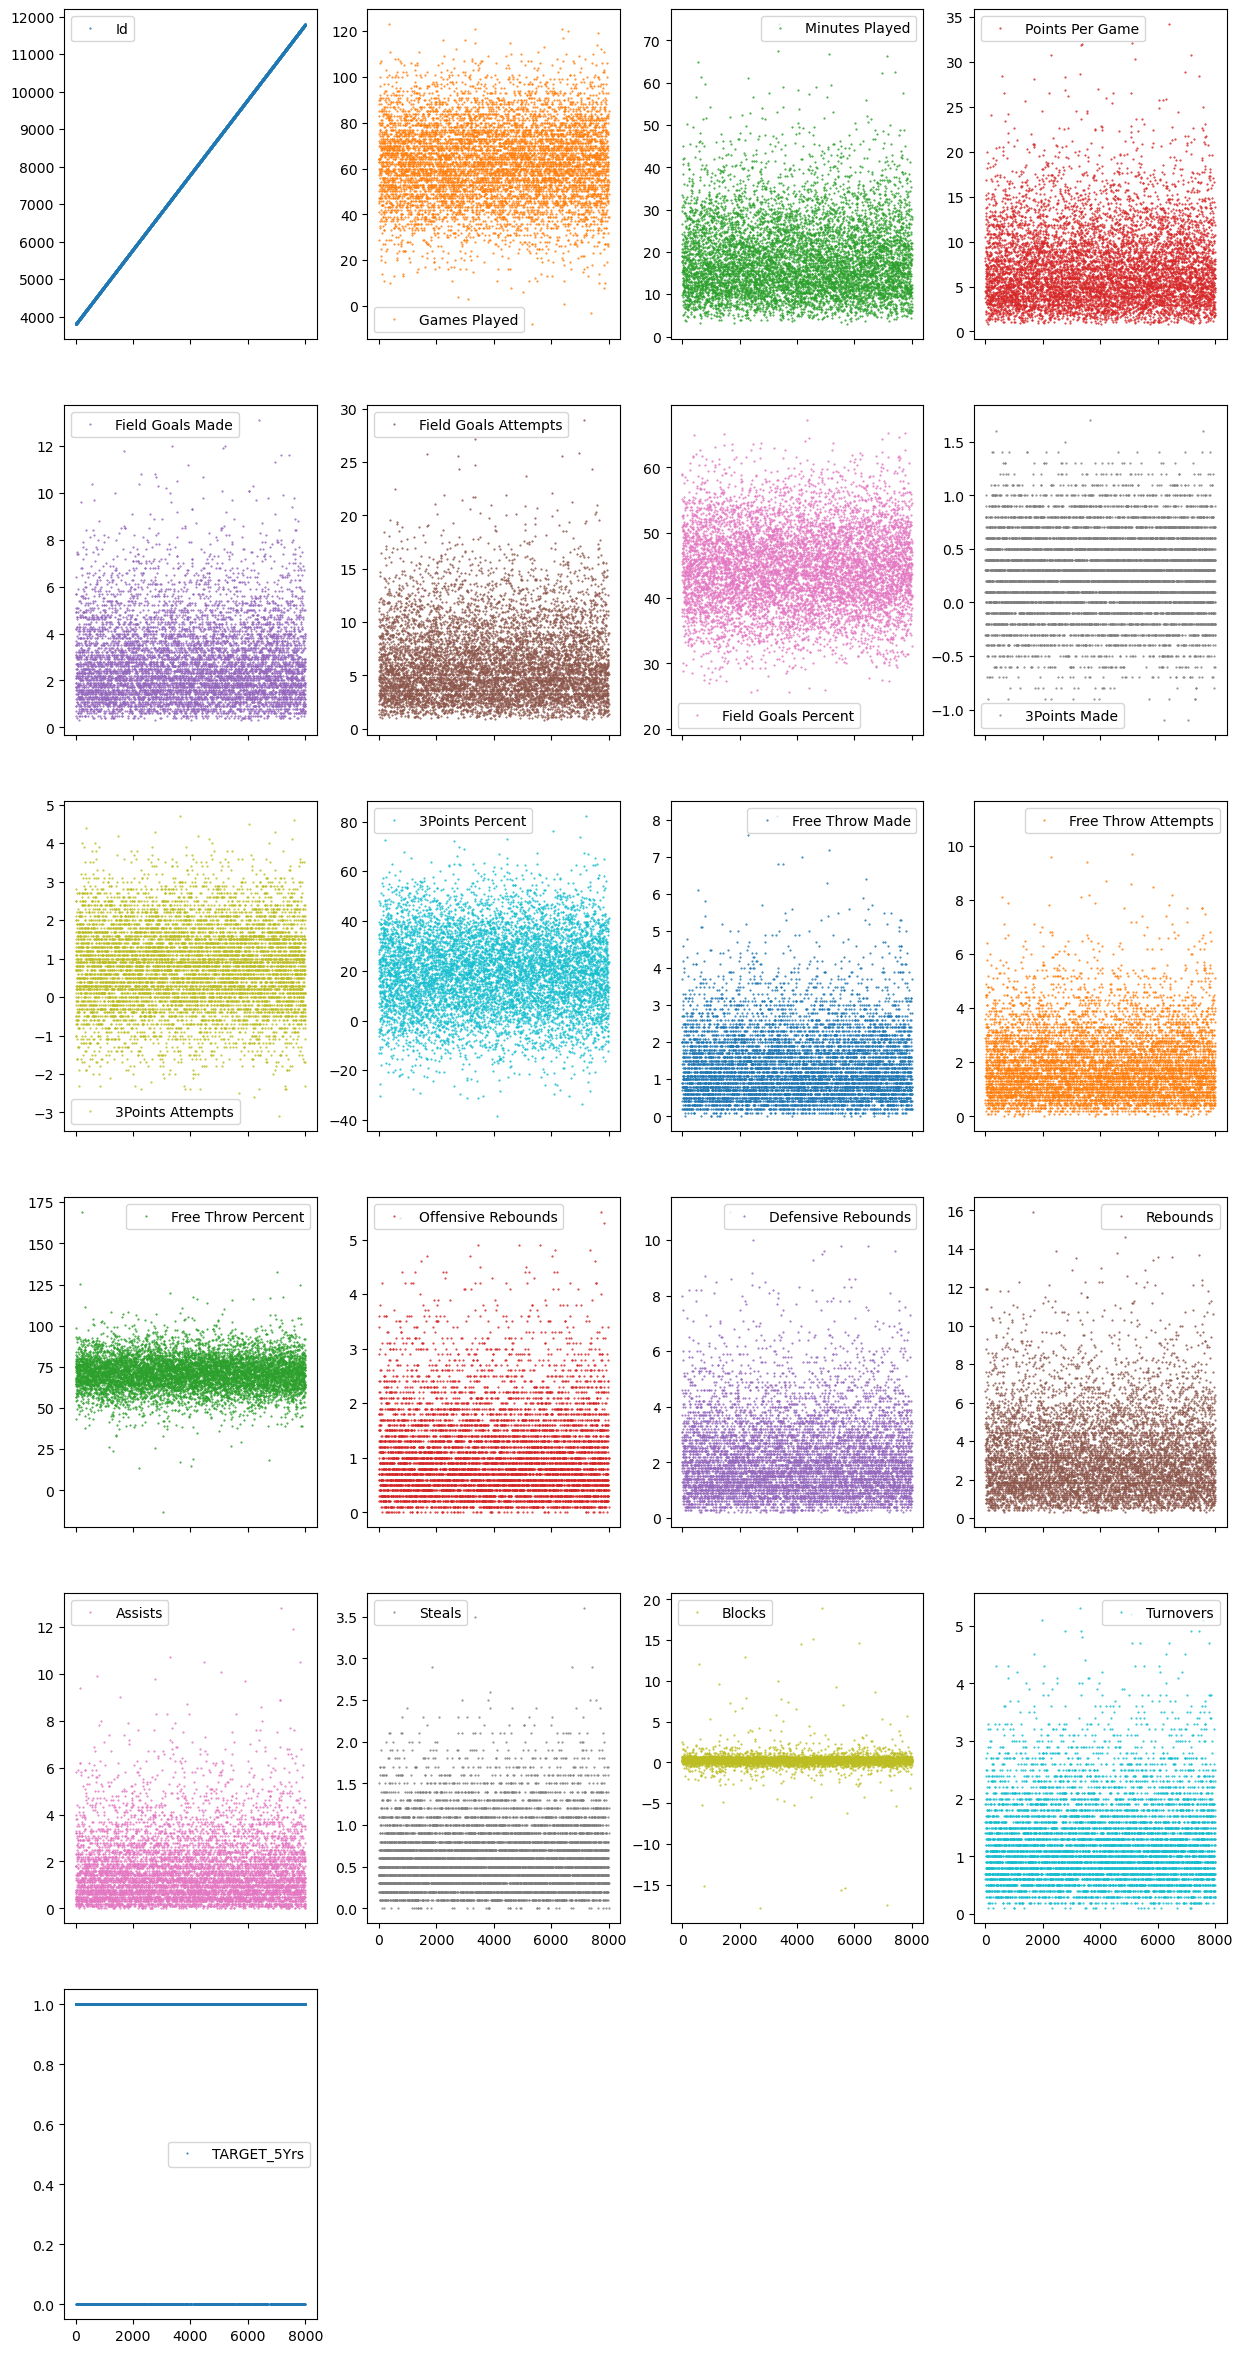

In [47]:
df_main.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

# 3. Content investigation

array([[<AxesSubplot: title={'center': 'Id'}>,
        <AxesSubplot: title={'center': 'Games Played'}>,
        <AxesSubplot: title={'center': 'Minutes Played'}>,
        <AxesSubplot: title={'center': 'Points Per Game'}>,
        <AxesSubplot: title={'center': 'Field Goals Made'}>],
       [<AxesSubplot: title={'center': 'Field Goals Attempts'}>,
        <AxesSubplot: title={'center': 'Field Goals Percent'}>,
        <AxesSubplot: title={'center': '3Points Made'}>,
        <AxesSubplot: title={'center': '3Points Attempts'}>,
        <AxesSubplot: title={'center': '3Points Percent'}>],
       [<AxesSubplot: title={'center': 'Free Throw Made'}>,
        <AxesSubplot: title={'center': 'Free Throw Attempts'}>,
        <AxesSubplot: title={'center': 'Free Throw Percent'}>,
        <AxesSubplot: title={'center': 'Offensive Rebounds'}>,
        <AxesSubplot: title={'center': 'Defensive Rebounds'}>],
       [<AxesSubplot: title={'center': 'Rebounds'}>,
        <AxesSubplot: title={'center': '

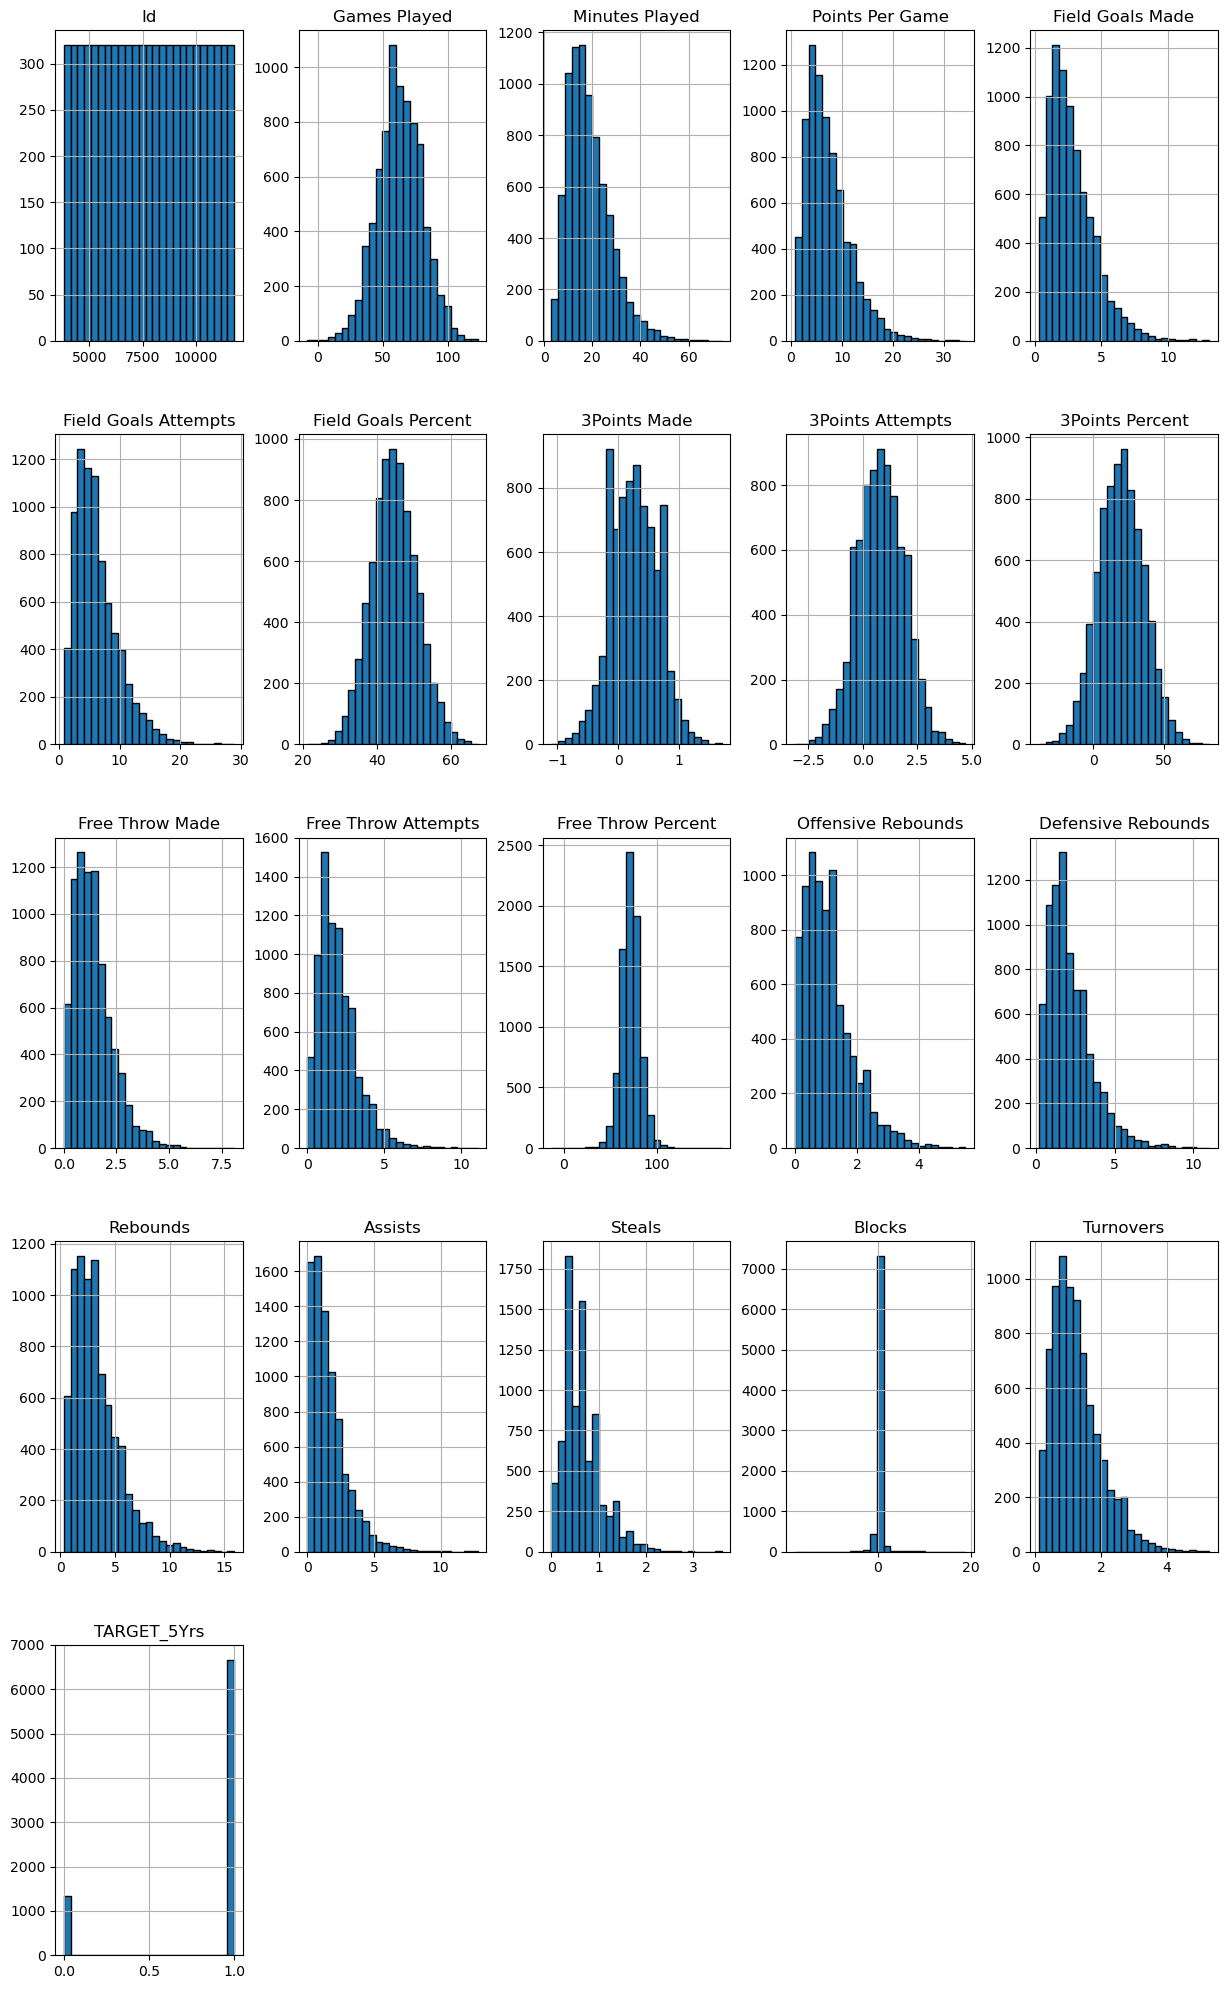

In [50]:
# Plots the histogram for each numerical feature in a separate subplot
df_main.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
# plt.tight_layout();